# Math - Probability and Statistics

Probability and Statistics are the foundation of Data Science. In fact, the underlying principles of machine learning and artificial intelligence are nothing but statistics, linear algebra, and differential calculus.

**Probability** is the branch of mathematics concerning numerical descriptions of how likely an event is to occur, or how likely it is that a proposition is true. **Statistics** is the discipline that concerns the collection, organization, analysis, interpretation, and presentation of data.

In this tutorial, we will
- Learn about probability rules and terms like random variables, probability distributions functions
- Learn about different probability distributions functions along with some of their properties.
- Learn to create and plot these distributions in python.

**Sources:** This notebook uses materials from the hackerearth statistics tutorial https://www.hackerearth.com/practice/machine-learning/, the datacamp tutorial on probability https://www.datacamp.com/community/tutorials/probability-distributions-python., and the lecture notes from Probability Theory for Machine Learning
by Chris Cremer, https://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/tutorial1.pdf.

### Preliminaries

Make sure we have installed the required plotting and image packages for this notebook. If not, install them

In [1]:
# %pip install vennfig
# %pip install seaborn
# %pip install scikit-learn

import numpy   as np
import pandas  as pd

import seaborn as sns
import vennfig as venn
import sklearn as sk

import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


# 1. Motivation
Uncertainty arises from:
- Noisy measurements
- Finite size of data sets
- Ambiguity: The word bank can mean (1) a financial institution, (2) the side of a river, or (3) tilting an airplane. Which meaning was intended, based on the words that appear nearby?
- Limited Model Complexity

Probability theory provides a consistent framework for the quantification
and manipulation of uncertainty. It enables optimal predictions given all the information available, even though that information may be incomplete or ambiguous.

## 2. Terminology for probability, events, and sample space

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Coin_Toss_%283635981474%29.jpg/440px-Coin_Toss_%283635981474%29.jpg" alt="Coin Flip" align="right" style="width: 200px;float: right;"/>

The **probability** gives the information about how likely an event can occur. The probability of an event is a number between 0 and 1, where, roughly speaking, 0 indicates impossibility of the event and 1 indicates certainty. The higher the probability of an event, the more likely it is that the event will occur.

The **sample space** Ω is the set of possible outcomes of an experiment. Points ω in Ω are called **sample outcomes**, realizations, or elements. Subsets of Ω are called **events**.

Example: If we toss a coin twice then the sample space is Ω = {HH, HT, TH, TT}. The event that the first toss is heads is A = {HH, HT}.

We say that events $A_1$ and $A_2$ are **disjoint** (mutually exclusive) if the events $A_1$ and $A_2$ have no sample outcomes in common. Mathematically, the intersection of the events $A_1$ and $A_2$ is the empty set, i.e., $A_i ∩ A_j = \{\}$.

Example: First flip being heads and first flip being tails are disjoint events.

## 3. Basic probability calculation

As per the definition, if $A$ is an event of an experiment and it contains $n$ outcomes and Ω is the sample space then the probability of $A$ is
$$
P(A) = \sum_{i=1}^n P(E_i),
$$
where $E_1 \dots E_n$ are the outcomes in $A$. If all the outcomes of the experiment are equally likely then

$$
P(A) = \frac{\text {No. of outcomes in A}}{\text{No. of outcomes in Ω}}.
$$

Hence the value of probability is between 0 and 1. As the sample space is the whole possible set of outcomes, $P(S) = 1.$

**Complement of A:** Complement of an event $A$ means not($A$). Probability of complement event of $A$ means the probability of all the outcomes in sample space other than the ones in $A$. Denoted by $A^c$ and
$$
P(A^c) = 1 - P(A).
$$

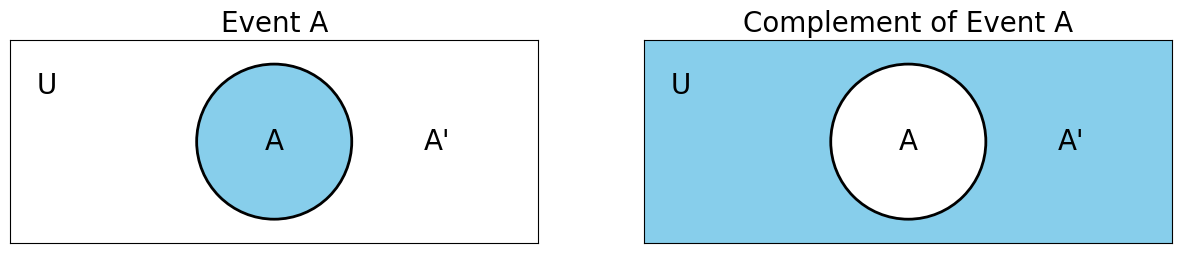

In [2]:
venn.complement(title_a='Event A', title_b='Complement of Event A', set_a='A', set_b="A'")

**Union and Intersection:** The union of two events $A$ and $B$ is the combination of all outcomes contained in the events. The intersection of two events $A$ and $B$ is the set of outcomes of $A$ that also belong to $B$.

The probability of intersection of two events $A$ and $B$ is $P(A\cap B)$. When event $A$ occurs in union with event $B$ then the probability together is defined as
$$
P(A \cup B) = P(A) + P(B)- P(A \cap B),
$$
which is also known as the **addition rule of probability**.

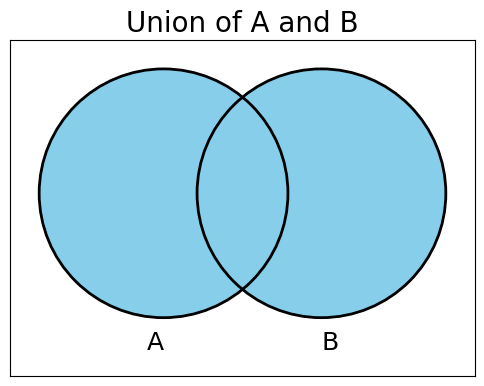

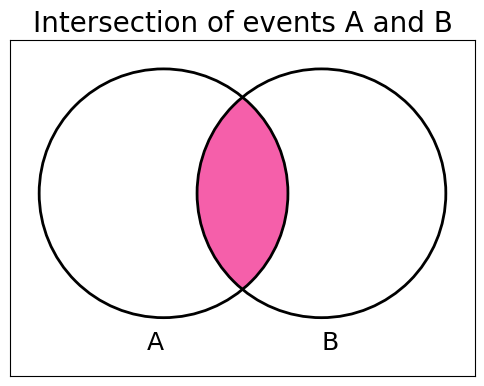

In [3]:
venn.true_false(subs=2, size=6, bg_color='white', title_a='Union of A and B')

venn.and_nand(subs=2, size=6, fill_color='#f55faa', bg_color='white', 
              title_a='Intersection of events A and B')

**Mutually exclusive:** Any two events are mutually exclusive, meaning they cannot both happen at the same time, when they have non-overlapping outcomes. If $A$ and $B$ are two mutually exclusive events then,
$P(A \cap B) = 0$. From the addition rule of probability
$P(A \cup B) = P(A) + P(B)$ as $A$ and $B$ are disjoint or mutually exclusive events.

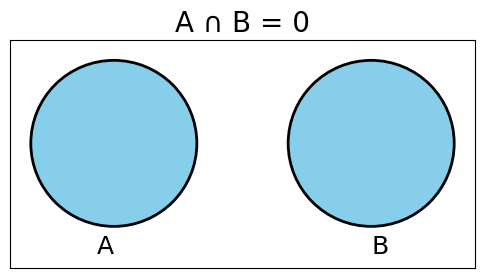

In [4]:
venn.mut_exclusive(size=6, title='A ∩ B = 0')

# 4. Joint, Marginal, and Conditional Probabilities

https://machinelearningmastery.com/joint-marginal-and-conditional-probability-for-machine-learning/

In machine learning, we often have many random variables that interact in often complex and unknown ways.

There are specific techniques that can be used to quantify the probability for multiple random variables, such as the marginal, joint, and conditional probability. These techniques provide the basis for a probabilistic understanding of fitting a predictive model to data.

- **Marginal probability**, $P(A)$, is the probability of an event, $A$, occuring irrespective of the outcome of other events.
- **Joint probability**, $P(AB)$, is the probability of two events, $A$ and $B$, occurring simultaneously.
- **Conditional probability**, $P(A|B)$, is the probability of one event, $A$, given a second event, $B$.
- **Independent events**: Any two events are independent of each other if one has zero effect on the other, *i.e.*, the occurrence of one event does not affect the occurrence of the other.

### Probabilities Rules
- Assuming that $P(B) > 0$, the conditional probability of $A$ given $B$:
$$
P(A|B)=P(AB)/P(B)
$$
- Product rule for joint probability:
$$
P(AB) = P(A|B)P(B) = P(B|A)P(A)
$$
- Two events $A$ and $B$ are **independent** if the joint probability is the product of the marginals
$$
P(AB) = P(A)P(B)
$$

### Example 1:
- 80% of students pass the final and 60% pass both the final and the midterm.
- What percent of students who passed the final also passed the midterm?

- Reworded: What percent of students passed the midterm, given they passed the final?
$$
P(M|F) = P(MF) / P(F) = 0.60 / 0.80 = 0.75 = 75\%
$$

### Example 2
- A student performs fracture measurements for 100 different oxide ceramics samples. Of the 100 samples, 50 were annealed at high temperatures for 1 hour, 65 samples fractured and 55 of the annealed samples fractured.
- What is the probability that a ceramic fractured, given that it was annealed? 

Explanation:
- Event A (Condition): The ceramic was annealed at high temperatures for 1 hour period (this is the "given" information).
- Event F: The ceramic fractures under a specific load.
- Let's create a Venn diagram illustrating the data

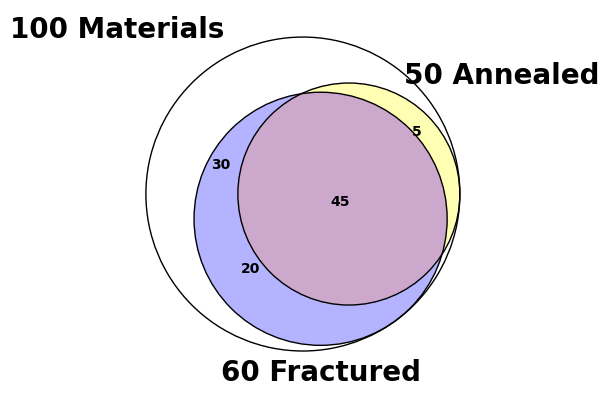

In [5]:
import matplotlib
from matplotlib_venn import venn3, venn3_circles
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

# Create 3 sets for materials with different properties
set_materials = {i for i in range(100)}     # 100 materials
set_annealed = {i for i in range(50)}       # 50 annealed materials
set_fractured = {i for i in range (5, 70)} # 60 fractured materials
# The number of annealed materials that show fractur is 40

#Change the label color to match the circle color
venn = venn3([set_materials, set_annealed, set_fractured], ('100 Materials', '50 Annealed', '60 Fractured'), 
       set_colors=('white', 'orange', 'blue'), alpha=1)
for text in venn.set_labels: text.set_fontsize(20)

venn3_circles([set_materials, set_annealed, set_fractured], linewidth=1, color='k')

plt.show()

- Reworded: What percentage of ceramics fractured, given that they were annealed?
$$
P(F|A) = P(FA) / P(A) = 0.45 / 0.50 = 0.90 = 90\%
$$

- Another question: What percentage of ceramics fractured, given that they were not annealed?
- First, we need to determine the number of ceramics that fractured but were not annealed. 50 ceramics were not annealed, 20 of which fractured.
- Next, we need to determine how many materials were not annealed, which is 50.

- Now. we can calculate the conditional probability:
$$
P (F| \neg A) = P(F (\neg A))/P(\neg A) = 0.2/0.5 = 0.4 = 40\%
$$

### Sum Rule and Law of Total Probability
- Sum Rule (Marginalization)
$$
P(A) = \sum_B P(AB)
$$

- Law of Total Probability
$$
P(A) = \sum_B P(A|B) \, P(B)
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif" alt="Thomas Bayes" align="right" style="width: 200px;float: right;"/>

## 5. Bayes' Theorem
Bayes' Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It is named after Thomas Bayes (shown on the right), an English Statistician, Philosopher, Presbyterian Minister living from 1701 to 1761. Bayes' work was published after his dead by Richard Price, who edited and corrected Bayes' manuscript. The modern formulation of Bayes theorem was devised by Pierre-Simon Laplace in 1774, who was unaware of Bayes' work.

Bayes' theorem states
$$
P(H|E) = \frac{P(H)\, P(E|H)}{P(E)}.
$$

We are interested in calculating the probability $P(H|E)$, which is the conditional probability that the hypthesis, H, is true given the evidence, E. It is called the **posterior probability**.

The probability $P(E|H)$ is the probability of seeing the evidence, if the hypothesis is true. It is called the **likelihood**.

The probabilities $P(H)$ is the probability that the hypothesis is true before any evidence is present. This marginal probability of call the **prior** probability.

The probability $P(E)$ is the probability of observing the **evidence** $E$. For the use of Bayes' Theorem, we often express the probability $P(E)$ by the conditional probabilities of $P(E|H)$ and $P(E|H^c)$:
$$
P(E) = P(E|H)\cdot P(H) + (E|H^c) \cdot [1-P(H)].
$$

This leads to the extended form of Bayes Theorem:
$$
P(H|E) = \frac{P(H)\, P(E|H)}{P(E|H)\cdot P(H) + (E|H^c) \cdot [1-P(H)]}.
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Bayes%27_Theorem_MMB_01.jpg/640px-Bayes%27_Theorem_MMB_01.jpg" alt="Neon sign of Bayes theorem" style="width:300px; float:right"/>
  
This image shows Bayes' theorem spelled out in blue neon at the offices of Autonomy in Cambridge, a company specializing in finger print recognition.

For a nice read about Bayes Theorem and testing for rare diseases, I suggest reading the following article in the Guardian: https://www.theguardian.com/world/2021/apr/18/obscure-maths-bayes-theorem-reliability-covid-lateral-flow-tests-probability.

### Example of Bayes' Theorem: Sensitivity and Specificity

Bayes' theorem elegantly demonstrates the effect of false positives and false negatives in medical tests.

**Sensitivity** is the true positive rate. It measures the fraction of correctly identified positives. In a Covid-19 test, it is be the percentage of people with a positive test who have Covid. A sensitive test rarely misses a positive.

**Specificity** is the true negative rate. It measures the fraction of correctly identified negatives. In a Covid-19 test, it is be the percentage of people with a negative test who do not have Covid. A specific test rarely registers a false positive.

A perfect test would be 100 percent sensitive and specific. In reality, tests have a minimum error called the Bayes error rate.

For example, consider a Covid-19 test that is 90% sensitive and 80% specific. If 5% of people have Covid-19, what is the probability a random person with a positive test actually has Covid?

In [6]:
# Relative population that has Covid
relative_population_with_covid          = 0.05

# True positive rate (sensitivity). The probability of having Covid when the test was positive.
positive_population_with_positive_covid = 0.90

# True negative rate (specificity). The probability of not having Covid when the test was negative.
negative_population_with_negative_covid = 0.80

# False positive rate. Probability of having Covid when the test was negative.
positive_population_with_negative_covid = 1.0 - negative_population_with_negative_covid

# Use the Law of Total Probability to calculate the denominator of Bayes' Theorem P(E),
# the probability of having a postive test

propability_of_positive_test = relative_population_with_covid * positive_population_with_positive_covid + \
                               positive_population_with_negative_covid * (1.0 - relative_population_with_covid)

# Bayes theorem
probability_positive_test_with_covid = relative_population_with_covid * positive_population_with_positive_covid / propability_of_positive_test

print(f"The probability of a random person with a "
      f"positive test having Covid is {probability_positive_test_with_covid*100.0:.1f} %")

The probability of a random person with a positive test having Covid is 19.1 %


> ## Assignment
>
> 1. How does this probability change when Covid is more prevalent, like 20 % of the population?
> 2. What happens for very rare diseases that only occur for 1 in 10,000 people for the same test accuracy?
> 3. How does this probability change for tests with higher specificity?

## 6. Confusion Matrix

<img src="https://github.com/rhennig/EMA6938/blob/main/Notebooks/Figures/ConfusionMatrix.png?raw=1" alt="Confusion Matrix" align="right" style="width:400px; float:right"/>

A confusion matrix is a table summarizing the number or percentage of correct and incorrect predictions. In machine learning, it is used to describe the performance of a classification model.

For a boolean classifier (Positive/Negative), the confusion matrix shown on the right contains four basic entries:

- **True Positives (TP)**: when the actual value is Positive and the prediction is also Positive.
- **True Negatives (TN):** when the actual value is Negative and the prediction is also Negative.
- **False Positives (FP):** When the actual value is Negative but the prediction is Positive. This is denoted as Type 1 error.
- **False Negatives (FN):** When the actual value is Positive but the prediction is Negative. This is denoted as Type 2 error.

A good model has high TP and TN fractions and low FP and FN fractions.


### Performance Measures
There are various metrics to measure the performance of a classification model, accuracy, precision, recall and others.

#### Accuracy

- Accuracy measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions:
<img src="https://github.com/rhennig/EMA6938/blob/main/Notebooks/Figures/ConfusionMatrix-Accuracy.png?raw=1" alt="Confusion Matrix Accuracy" align="right" style="width:300px; float:right"/>

$$
\mathrm{ACC = \frac{TP + TN}{P + N}}.
$$

- Accuracy measures correctness that is achieved in true prediction. It describes how many predictions are actually correct out of all the total positive and negative predictions. It is a useful metric for evaluation a classification problem, which is well balanced and not skewed and has no imbalance in the number of entries for each class. For imbalanced data, the accuracy can be high if the model predicts that each point belongs to the majority class. However, in that case the model is not accurate.s

<img src="https://github.com/rhennig/EMA6938/blob/main/Notebooks/Figures/ConfusionMatrix-Precision.png?raw=1" alt="Confusion Matrix Precision" align="right" style="width:300px; float:right"/>

#### Precision

- Precision measures the correctness that is achieved for true predictions. It describes how many predictions are actually positive among all positive predictions.

$$
\mathrm{PREC = \frac{TP}{TP+FP}}.
$$

- Precision is a useful measure when False Positive is a higher concern than False Negatives.

- Examples where classifiers need to focus on minimizing False Positives are spam detection and recommendation systems. In each of these cases, the goal is to reduce False Positives.

<img src="https://github.com/rhennig/EMA6938/blob/main/Notebooks/Figures/ConfusionMatrix-Recall.png?raw=1" alt="Confusion Matrix Recall" align="right" style="width:300px; float:right"/>

#### Recall

- Recall measures actual observations that are predicted correctly, i.e. how many observations of positive class are actually predicted as positive. It is also known as Sensitivity.

$$
\mathrm{REC = \frac{TP}{TP+FN}}.
$$

- Recall is a useful evaluation metric when we want to capture as many positives as possible.

- Recall is a useful metric in cases where False Negative is more important than False Positive.

- An example are medical cases where it often matters more that actual positive cases do not go undetected than raising a false alarm. Recall is the better metric because we want to treat sick people and avoid infected people to mix with the healthy population thereby spreading a contagious virus.

### Example Case

Let's simulate the case above for 1,000,000 people and estimate the number of positive and negative tests results and the number of people that have Covid or are healthy. We will use some more realistic values for the sensitivity and specificity.

People with Covid-19 = 50094
Healthy people       = 949906
Positive tests       = 234627
Negative tests       = 765373

Confusion matrix:
Test        Negative  Positive      All
Population                             
Healthy       760378    189528   949906
Sick            4995     45099    50094
All           765373    234627  1000000


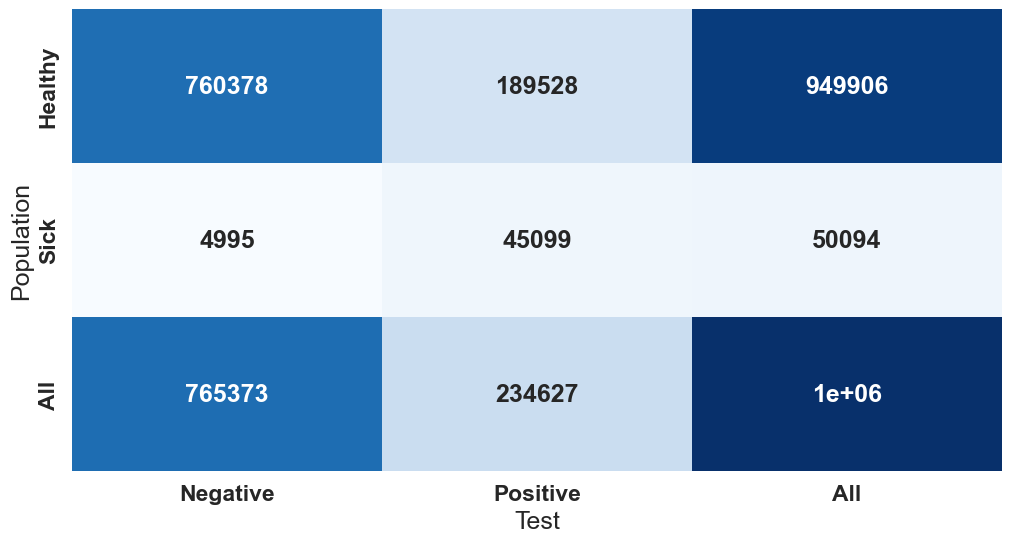

In [7]:
# Import uniform distribution from scipy
from scipy.stats import bernoulli

total_population    = 1000000
sick_probability    = 0.05
testing_sensitivity = 0.9
testing_specificity = 0.8

# Generate bernoulli for a total population of 1,000,000 
population_distribution = bernoulli.rvs(size=total_population, p=sick_probability)

sick_population         = population_distribution[population_distribution==1]
healthy_population      = population_distribution[population_distribution==0]

print(f"People with Covid-19 = {sick_population.size}")
print(f"Healthy people       = {healthy_population.size}")

# Next, apply the test with a sensitivity of 90% and a specificity of 80%
positive_sick_population     = bernoulli.rvs(size=total_population, p=testing_sensitivity)
negative_healthy_population  = bernoulli.rvs(size=total_population, p=testing_specificity)

test_result = positive_sick_population*population_distribution + \
              (1.0 - negative_healthy_population) * (1.0 - population_distribution)

print(f"Positive tests       = {test_result[test_result==1].size}")
print(f"Negative tests       = {test_result[test_result==0].size}")

# Process data by replacing numbers with strings
population_labeled  = np.where(population_distribution==1, 'Sick', 'Healthy')
test_result_labeled = np.where(test_result==1, 'Positive', 'Negative')

population_data = {"Population": population_labeled,
                   "Test"      : test_result_labeled}

# Here we us the tools of the Pandas Dataframe Library to calculate the confusion matrix
df = pd.DataFrame(population_data, columns=['Population', 'Test'])

confusion_matrix_data = pd.crosstab(df['Population'], df['Test'],
                                    rownames=['Population'], colnames=['Test'], 
                                    margins = True)

print(f"\nConfusion matrix:\n{confusion_matrix_data}")

plt.figure(figsize=(12, 6))

sns.set(font_scale=1.5)

sns.heatmap(confusion_matrix_data, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.show()

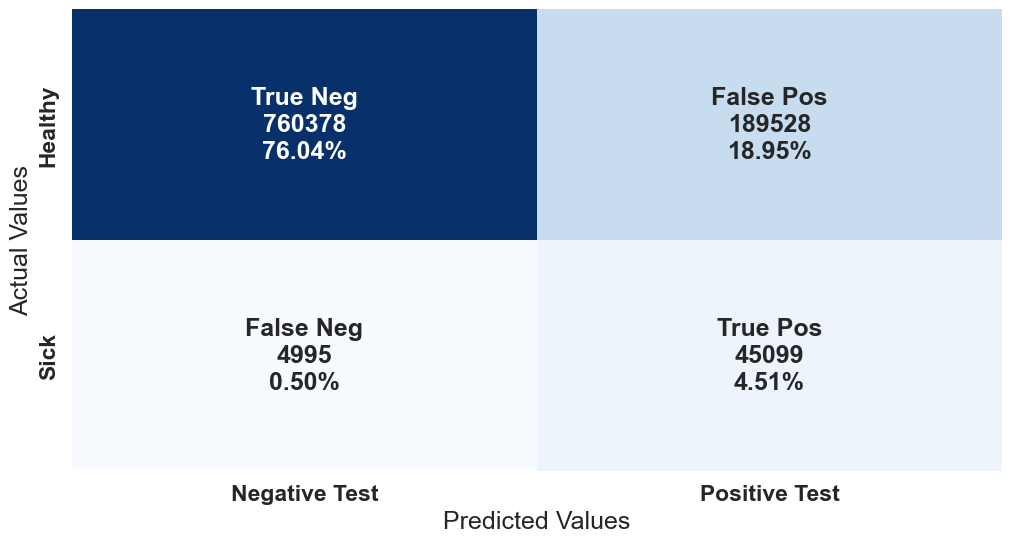

In [8]:
# We can also use scikitlearn to calculate the confusion matrix
# Here, we will display the labels, numbers, and percentages
from sklearn.metrics import confusion_matrix

confusion_matrix_data    = confusion_matrix(population_distribution, test_result)

group_names       = ['True Neg','False Pos','False Neg','True Pos']

group_counts      = ["{0:0.0f}".format(value) for value in confusion_matrix_data.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_data.flatten()/np.sum(confusion_matrix_data)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(12, 6))

sns.set(font_scale=1.5)

sns.heatmap(confusion_matrix_data, annot=labels, fmt='', 
            xticklabels=['Negative Test', 'Positive Test'],
            yticklabels=['Healthy', 'Sick'],
            cmap='Blues', cbar=False)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

> ## Assignment
>
> 1. What is the number of true positives and false negatives?
> 2. What is the probability of a sick person to have a negative test result?
> 3. What is the probability of a healthy person to have a positive test result?
> 4. What is the probability of a random person with a positive test result to have Covid?

## 6. Random Variables

### Discrete and Continuous Random Variables

A random variable is a variable whose possible values are numerical outcomes of a random phenomenon. 

Example: Flip a coin ten times. Let X(ω) be the number of heads in the sequence ω. If ω = HHTHHTHHTT, then X(ω) = 6.

There are two types of random variables, discrete and continuous.

A **discrete random variable** takes on only a countable number of distinct values and thus can be quantized.

Example:
- The number that comes up when you roll a fair dice. X can take values : [1, 2, 3, 4, 5, 6].
- The number of heads coming up when rolling a dice a fixed number of times.

A **continuous random variable** can take on infinitely many values and is described by a real number.

Example:
- Time taken to accomplish task.
- Height of graduate students in MSE.

### Probability Distribution

A probability distribution is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Discrete_probability_distrib.svg/640px-Discrete_probability_distrib.svg.png" alt="Probability distribution" align="right" style="width: 200px;float: right;"/>

The **probability distribution of a discrete random variable** is a list of probabilities associated with each of its possible values. It is also sometimes called the probability function or the probability mass function. An example is shown on the right for a random variable describing three possible events.

Suppose a random variable $X$ takes $k$ different values, with the probability that $X = x_i$ given by $P(x_i) = p_i$. The probabilities $p_i$ must satisfy

1) $0 < p_i < 1$ for each i
2) $\sum_{i=1}^k p_i = 1$.

Examples of discrete probability distributions are the Bernoulli, Binomial, and Poisson distribution.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/640px-Standard_deviation_diagram.svg.png" alt="Probability distribution function" align="right" style="width: 200px;float: right;"/>

A continuous random variable is defined over an interval of values. The **probability distribution of a continuous random variable**, known as probability distribution functions, are the functions that take on continuous values. The example of a normal or Gaussian probability distribution function is shown on the right.

The probability of observing any single value is equal to 0 since the number of values which may be assumed by the random variable is infinite. 

A random variable $X$ may take all values over an interval of real numbers. Then the probability $P(A)$ that $X$ is in the set of outcomes $A$ is defined to be the area in the curve over the set $A$.

The curve, which represents a function $p(x)$, must satisfy the following:
1) The curve has no negative values (p(x)>0 for all x
2) The total area under the curve is equal to 1, $\int p(x) dx = 1$.

Some examples of continuous probability distributions are normal the distribution, exponential, and beta distribution.

There’s another type of distribution that is relevant for random variables, the cumulative distribution function. All random variables (discrete and continuous) have a cumulative distribution function. It is a function giving the probability that the random variable $X$ is less or equal than $x$, for every value $x$. For a discrete random variable, the cumulative distribution function is found by summing up the probabilities. For continuous random variables, it is given by the integral from $-\infty$ to $x$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Combined_Cumulative_Distribution_Graphs.png/800px-Combined_Cumulative_Distribution_Graphs.png" alt="Probability distribution function" align="center" style="width: 600px;float: center;"/>

The left figure shows the probability distribution function (pdf) $f(x)$ and the right one shows the cummulative distribution function (cdf) $F(x) = \int_{-\infty^x} p(x') dx'$.

In the next section, we will explore some important distributions and try to work them out in python. First we will setup our plots.

In [9]:
# Settings for seaborn plotting style
sns.set(color_codes=True)

# Settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(6,4)})

### The Uniform Distribution

We can import uniform distribution from scipy.stats and use it to generate uniform random numbers.

<function matplotlib.pyplot.show(close=None, block=None)>

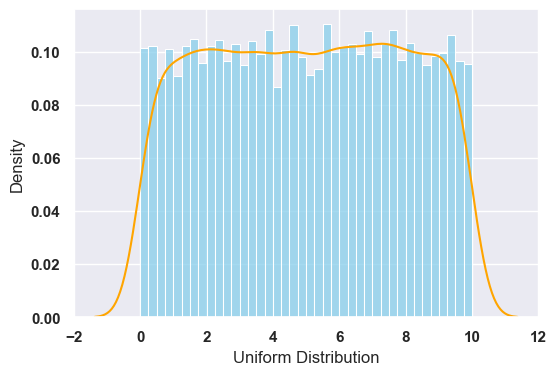

In [10]:
# Import uniform distribution
from scipy.stats import uniform

# Generate random numbers from uniform distribution
n     = 10000
start = 0
width = 10

data_uniform = uniform.rvs(size=n, loc = start, scale=width)

# Plot the binned data in blue. The orange line indicates the kernel density estimation (KDE) of the probability function
# For more information, see https://en.wikipedia.org/wiki/Kernel_density_estimation

sns.histplot(data_uniform, stat='density', bins=40, color='skyblue')

sns.kdeplot(data_uniform, color="orange")

plt.xlabel('Uniform Distribution')
plt.ylabel('Density')

plt.show

#### Kernel density estimation

If you like to learn more about how scikit learn performs the kernel density estimation, here is a good summary of the method: https://scikit-learn.org/stable/modules/density.html.

### The Normal or Gaussian Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

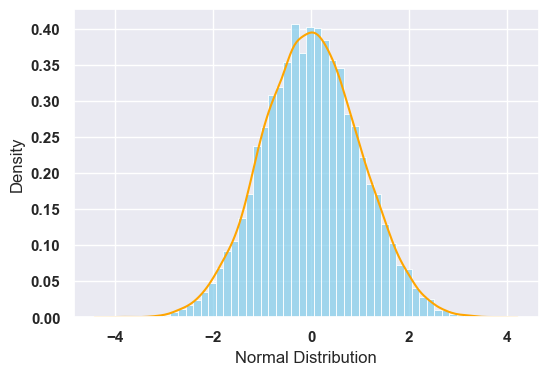

In [11]:
# import normal distribution
from scipy.stats import norm

# generate random numbersfrom N(0,1)
data_normal = norm.rvs(size=10000, loc=0, scale=1)

sns.histplot(data_normal, stat='density', bins=50, color='skyblue')

sns.kdeplot(data_normal, color="orange")

plt.xlabel('Normal Distribution')
plt.ylabel('Density')

plt.show

### The Binomial Distribution
The binomial distribution with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $n$ independent experiments, each asking a yes/no question. Each question has the probability of $p$ for yes and $1-p$ for no.

<function matplotlib.pyplot.show(close=None, block=None)>

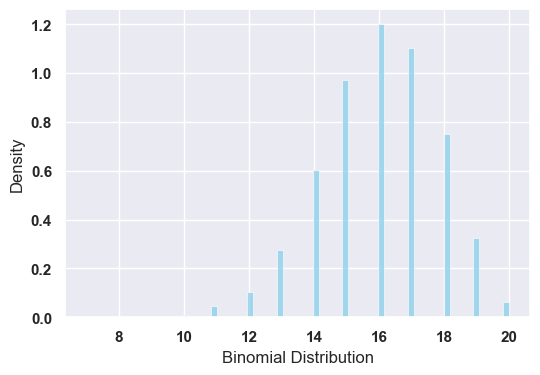

In [12]:
# Import binom
from scipy.stats import binom

# generate binom
data_binom = binom.rvs(n=20, p=0.8,size=10000)

sns.histplot(data_binom, stat='density', color='skyblue')

plt.xlabel('Binomial Distribution')
plt.ylabel('Density')

plt.show

Since the probability of success was 0.8 `p=0.8`, which is greater than 0.5 the distribution is skewed towards the right side.

Also, the Poisson distribution is a limiting case of a binomial distribution under the following conditions:
- The number of trials is infinitely large or $n \to \infty$.
- The probability of success for each trial is same and infinitely small or $p \to 0$.
- The product $np=\lambda$ remains finite.

The Normal distribution is another limiting form of binomial distribution under the following conditions:
- The number of trials is infinitely large, $n \to \infty$.
- Neither $p$ nor $q$ are infinitely small.

### The Bernoulli Distribution

The Bernoulli distribution is named after the Swiss mathematician Jacob Bernoulli. It is the discrete probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q=1-p$. It can be thought of as a model for the set of possible outcomes of any single experiment that asks a yes/no question.

<function matplotlib.pyplot.show(close=None, block=None)>

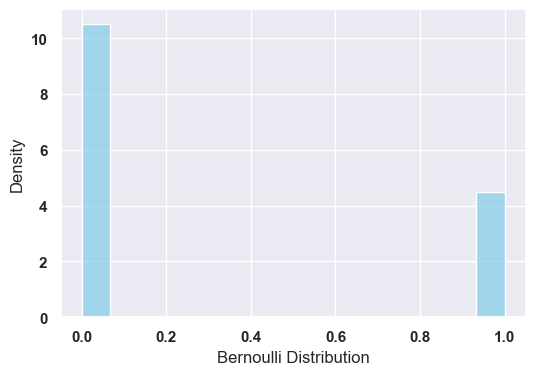

In [13]:
# Import bernoulli
from scipy.stats import bernoulli

# generate bernoulli
data_bern = bernoulli.rvs(size=10000, p=0.3)


sns.histplot(data_bern, stat='density', color='skyblue')

plt.xlabel('Bernoulli Distribution')
plt.ylabel('Density')

plt.show

### Poisson Distribution

The Poisson distribution is named after the French mathematician Siméon Denis Poisson. It is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

<function matplotlib.pyplot.show(close=None, block=None)>

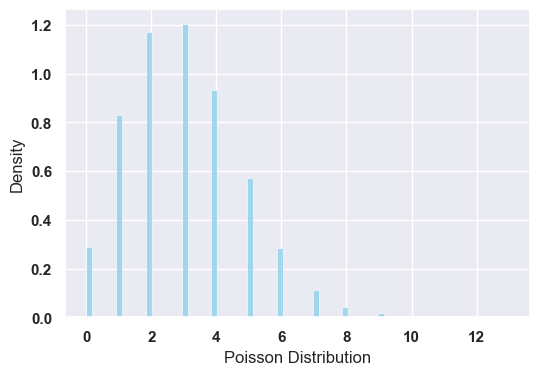

In [14]:
# Import Poisson distribution
from scipy.stats import poisson

data_poisson = poisson.rvs(mu=3, size=10000)

sns.histplot(data_poisson, stat='density', color='skyblue')

plt.xlabel('Poisson Distribution')
plt.ylabel('Density')

plt.show

> ## Assignment
>
> Create plots for the Binomial distribution that illustrates how the probability distribution function changes to one that approaches the Poisson distribution and the normal distribution.